## Assignment 1 - Gradient Descent Algorithms with PyTorch
The following code cell is used to generate some noisy data (don't change this code).  You will need to use the data generated here to train a linear model $y=ax+b$ (i.e., Perform gradient descent on the two parameters $a$ and $b$).


1.   You will need to code two algorithms (1) Gradient Descent + regular momentum, and (2) Adam, using PyTorch "autograd".
2.   Check your results against the linear regression model. You can do linear regression using "sklearn.linear_model" (Hint: you need to convert tensor to numpy array.)






In [ ]:
import torch
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from torch.utils.data import TensorDataset
torch.manual_seed(42)
x = torch.rand(100,1)
y = 1 + 2 * x + .1 * torch.rand(100, 1)

In [ ]:
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
a, b

(tensor([-0.6430], requires_grad=True), tensor([0.7113], requires_grad=True))

## Your code goes here:

In [ ]:
#parameters and initial value
beta1 = 0.90 #beta1 for adam
beta2 = 0.999 #beta2 for adam
lr = 0.001 #learning rate
e = 10e-8 #epsilon
#all initial grad descent + momentum and adam values
vt1 = vt2 = mt1_a = mt1_b = vt1_a = vt1_b = mt1_a_hat = mt1_b_hat = vt1_a_hat = vt1_b_hat = 0

epochs = 500 #times to train each model
train_data = TensorDataset(x,y) #make iterable dataset

In [ ]:
#mean squared error
def mse(predictions, targets):
    difference = predictions - targets
    return torch.sum(difference * difference)/ difference.numel()

Epoch 0/500: Loss: 0.09512635320425034
Epoch 1/500: Loss: 0.06556525826454163
Epoch 2/500: Loss: 0.04635302349925041
Epoch 3/500: Loss: 0.03259291499853134
Epoch 4/500: Loss: 0.022370165213942528
Epoch 5/500: Loss: 0.0147037822753191
Epoch 6/500: Loss: 0.00901404581964016
Epoch 7/500: Loss: 0.004925541579723358
Epoch 8/500: Loss: 0.002178986556828022
Epoch 9/500: Loss: 0.0005864981794729829
Epoch 10/500: Loss: 6.951405794097809e-06
Epoch 11/500: Loss: 0.00033075996907427907
Epoch 12/500: Loss: 0.0014706666115671396
Epoch 13/500: Loss: 0.0033555387053638697
Epoch 14/500: Loss: 0.005926396697759628
Epoch 15/500: Loss: 0.00913304928690195
Epoch 16/500: Loss: 0.012932496145367622
Epoch 17/500: Loss: 0.01728695258498192
Epoch 18/500: Loss: 0.022163020446896553
Epoch 19/500: Loss: 0.027530323714017868
Epoch 20/500: Loss: 0.03336144611239433
Epoch 21/500: Loss: 0.03963042050600052
Epoch 22/500: Loss: 0.046313993632793427
Epoch 23/500: Loss: 0.053389232605695724
Epoch 24/500: Loss: 0.060834567

Epoch 208/500: Loss: 0.07013694941997528
Epoch 209/500: Loss: 0.06811846792697906
Epoch 210/500: Loss: 0.06613270938396454
Epoch 211/500: Loss: 0.06418043375015259
Epoch 212/500: Loss: 0.062260858714580536
Epoch 213/500: Loss: 0.060374174267053604
Epoch 214/500: Loss: 0.05851968750357628
Epoch 215/500: Loss: 0.056697823107242584
Epoch 216/500: Loss: 0.054908398538827896
Epoch 217/500: Loss: 0.05315134674310684
Epoch 218/500: Loss: 0.051426272839307785
Epoch 219/500: Loss: 0.04973364621400833
Epoch 220/500: Loss: 0.048073265701532364
Epoch 221/500: Loss: 0.046444717794656754
Epoch 222/500: Loss: 0.04484832286834717
Epoch 223/500: Loss: 0.04328341782093048
Epoch 224/500: Loss: 0.04175049066543579
Epoch 225/500: Loss: 0.04024917259812355
Epoch 226/500: Loss: 0.03877933323383331
Epoch 227/500: Loss: 0.037340838462114334
Epoch 228/500: Loss: 0.035933736711740494
Epoch 229/500: Loss: 0.03455737978219986
Epoch 230/500: Loss: 0.033212073147296906
Epoch 231/500: Loss: 0.03189760446548462
Epoch 

Epoch 403/500: Loss: 0.00046936090802773833
Epoch 404/500: Loss: 0.00046938672312535346
Epoch 405/500: Loss: 0.00046941256732679904
Epoch 406/500: Loss: 0.00046943838242441416
Epoch 407/500: Loss: 0.00046946422662585974
Epoch 408/500: Loss: 0.000469484890345484
Epoch 409/500: Loss: 0.00046951070544309914
Epoch 410/500: Loss: 0.0004695365496445447
Epoch 411/500: Loss: 0.00046956236474215984
Epoch 412/500: Loss: 0.0004695830284617841
Epoch 413/500: Loss: 0.0004696036921814084
Epoch 414/500: Loss: 0.0004696243559010327
Epoch 415/500: Loss: 0.0004696398682426661
Epoch 416/500: Loss: 0.0004696657124441117
Epoch 417/500: Loss: 0.00046969152754172683
Epoch 418/500: Loss: 0.0004697121912613511
Epoch 419/500: Loss: 0.0004697380354627967
Epoch 420/500: Loss: 0.00046975869918242097
Epoch 421/500: Loss: 0.0004697793920058757
Epoch 422/500: Loss: 0.00046978972386568785
Epoch 423/500: Loss: 0.0004698000557255
Epoch 424/500: Loss: 0.00046981038758531213
Epoch 425/500: Loss: 0.00046982071944512427
Epo

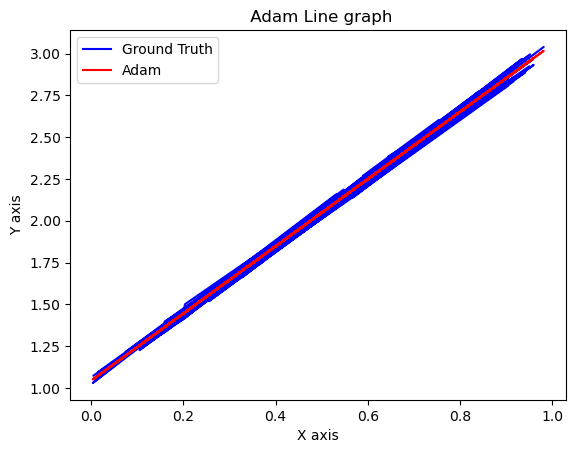

In [ ]:
#adam optimizer
#larger learning rate than GD + momentum was needed for the same epochs
for i in range(epochs):
    index = 1
    for X,Y in train_data:
        pred = a*X + b # model
        mse(pred,Y).backward() #backpropagate error
        with torch.no_grad():
            mt1_a = beta1*mt1_a + (1-beta1)*a.grad # a momentum
            mt1_b = beta1*mt1_b + (1-beta1)*b.grad # b momentum

            vt1_a = beta2*vt1_a + (1-beta2)*a.grad**2 # a exponentially decaying average of past squared
            vt1_b = beta2*vt1_b + (1-beta2)*b.grad**2 # b exponentially decaying average of past squared

            mt1_a_hat = mt1_a/(1-beta1**index) # a  momentum bias correction
            mt1_b_hat = mt1_b/(1-beta1**index) # b momentum bias correction

            vt1_a_hat = vt1_a/(1-beta2**index) # a second moment bias correction
            vt1_b_hat = vt1_b/(1-beta2**index) # b second moment bias correction

            a -= (mt1_a_hat * lr/(torch.sqrt(vt1_a_hat) + e)) #adjust a
            b -= (mt1_b_hat * lr/(torch.sqrt(vt1_b_hat) + e)) #adjust b
            a.grad.zero_()
            b.grad.zero_()
            index+=1
    print(f"Epoch {i}/{epochs}: Loss: {mse(pred, Y)}")
preds = []
acts_X = []
acts_Y = []
for X,Y in train_data:
    pred = a*X + b # model
    acts_X.append(X.cpu().detach().numpy()[0])
    acts_Y.append(Y.cpu().detach().numpy()[0])
    preds.append(pred.cpu().detach().numpy()[0])

# plotting
plt.title(" Adam Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(acts_X, acts_Y, color ="b", label = "Ground Truth")
plt.plot(acts_X, preds, color ="r", label = "Adam")
plt.legend()
plt.show()

Epoch 0/500: Loss: 0.014112119562923908
Epoch 1/500: Loss: 4.943060874938965
Epoch 2/500: Loss: 0.03300470858812332
Epoch 3/500: Loss: 4.148271083831787
Epoch 4/500: Loss: 0.02650102972984314
Epoch 5/500: Loss: 2.6744861602783203
Epoch 6/500: Loss: 0.24036024510860443
Epoch 7/500: Loss: 2.920638084411621
Epoch 8/500: Loss: 0.09053262323141098
Epoch 9/500: Loss: 1.7341524362564087
Epoch 10/500: Loss: 0.2603541910648346
Epoch 11/500: Loss: 1.5757354497909546
Epoch 12/500: Loss: 0.25615620613098145
Epoch 13/500: Loss: 1.2710915803909302
Epoch 14/500: Loss: 0.21458955109119415
Epoch 15/500: Loss: 0.8186702728271484
Epoch 16/500: Loss: 0.3200455605983734
Epoch 17/500: Loss: 0.7428210377693176
Epoch 18/500: Loss: 0.2647619843482971
Epoch 19/500: Loss: 0.5410639643669128
Epoch 20/500: Loss: 0.23249594867229462
Epoch 21/500: Loss: 0.32284215092658997
Epoch 22/500: Loss: 0.32703888416290283
Epoch 23/500: Loss: 0.36352697014808655
Epoch 24/500: Loss: 0.17596864700317383
Epoch 25/500: Loss: 0.149

Epoch 210/500: Loss: 0.0005539866397157311
Epoch 211/500: Loss: 0.0005551938083954155
Epoch 212/500: Loss: 0.0005514306831173599
Epoch 213/500: Loss: 0.0005506359739229083
Epoch 214/500: Loss: 0.0005541325663216412
Epoch 215/500: Loss: 0.0005546602187678218
Epoch 216/500: Loss: 0.0005514306831173599
Epoch 217/500: Loss: 0.0005511451745405793
Epoch 218/500: Loss: 0.0005539866397157311
Epoch 219/500: Loss: 0.0005540483398362994
Epoch 220/500: Loss: 0.0005513858632184565
Epoch 221/500: Loss: 0.0005514306831173599
Epoch 222/500: Loss: 0.0005537846009247005
Epoch 223/500: Loss: 0.0005535770324058831
Epoch 224/500: Loss: 0.000551447446923703
Epoch 225/500: Loss: 0.0005517722456716001
Epoch 226/500: Loss: 0.0005537004908546805
Epoch 227/500: Loss: 0.0005533246439881623
Epoch 228/500: Loss: 0.0005516770179383457
Epoch 229/500: Loss: 0.0005521307466551661
Epoch 230/500: Loss: 0.0005535995005629957
Epoch 231/500: Loss: 0.0005531844799406826
Epoch 232/500: Loss: 0.0005518898833543062
Epoch 233/50

Epoch 401/500: Loss: 0.0005526238237507641
Epoch 402/500: Loss: 0.0005526406457647681
Epoch 403/500: Loss: 0.0005526462337002158
Epoch 404/500: Loss: 0.0005526406457647681
Epoch 405/500: Loss: 0.0005526350578293204
Epoch 406/500: Loss: 0.0005526462337002158
Epoch 407/500: Loss: 0.0005526518798433244
Epoch 408/500: Loss: 0.0005526518798433244
Epoch 409/500: Loss: 0.0005526462337002158
Epoch 410/500: Loss: 0.0005526406457647681
Epoch 411/500: Loss: 0.0005526406457647681
Epoch 412/500: Loss: 0.0005526462337002158
Epoch 413/500: Loss: 0.0005526518798433244
Epoch 414/500: Loss: 0.0005526462337002158
Epoch 415/500: Loss: 0.0005526406457647681
Epoch 416/500: Loss: 0.0005526406457647681
Epoch 417/500: Loss: 0.0005526462337002158
Epoch 418/500: Loss: 0.0005526518798433244
Epoch 419/500: Loss: 0.0005526518798433244
Epoch 420/500: Loss: 0.0005526406457647681
Epoch 421/500: Loss: 0.0005526350578293204
Epoch 422/500: Loss: 0.0005526406457647681
Epoch 423/500: Loss: 0.0005526462337002158
Epoch 424/5

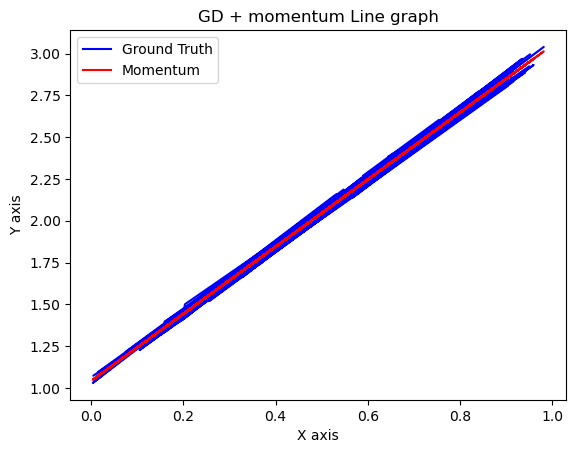

In [ ]:
# stochastic gradient descent + momentum
lr = 0.0001
a2 = torch.randn(1, requires_grad=True)
b2 = torch.randn(1, requires_grad=True)
for i in range(epochs):
    for X,Y in train_data:
        pred = a2*X + b2 #model
        mse(pred,Y).backward() #backprobagate error
        with torch.no_grad():
            #using beta2 as momentum
            vt1 = beta2*vt1 + a2.grad # a momentum
            vt2 = beta2*vt2 + b2.grad # b momentum
            a2 -= (vt1 * lr) # adjust a
            b2 -= (vt2 * lr) # adjust b
            a2.grad.zero_()
            b2.grad.zero_()
    print(f"Epoch {i}/{epochs}: Loss: {mse(pred, Y)}")
#get data to plot
preds = []
acts_X = []
acts_Y = []
for X,Y in train_data:
    pred = a2*X + b2 # model
    acts_X.append(X.cpu().detach().numpy()[0])
    acts_Y.append(Y.cpu().detach().numpy()[0])
    preds.append(pred.cpu().detach().numpy()[0])

# plotting
plt.title("GD + momentum Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(acts_X, acts_Y, color ="b", label = "Ground Truth")
plt.plot(acts_X, preds, color ="r", label = "Momentum")
plt.legend()
plt.show()

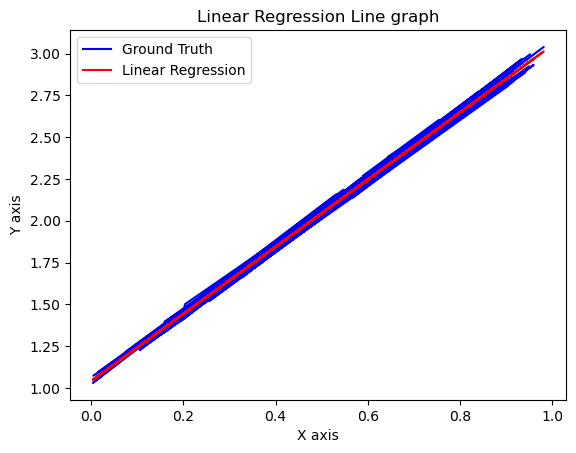

In [ ]:
#sklearn linear regression
x = x.cpu().detach().numpy()
y = y.cpu().detach().numpy()
reg = LinearRegression().fit(x, y)
predictions = reg.predict(x)

plt.title("Linear Regression Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="b", label = "Ground Truth")
plt.plot(x, predictions, color ="r", label = "Linear Regression")
plt.legend()
plt.show()

In [ ]:
print("---------------------------------")
print("a and b cofficients for each of")
print("the models fitting y = ax + b")
print("---------------------------------")
print("| model         ||   a  ||   b  |")
print(f"| GD + Momentum || {a2.cpu().detach().numpy()[0]:.2f} || {b2.cpu().detach().numpy()[0]:.2f} |")
print(f"| GD + Adam     || {a.cpu().detach().numpy()[0]:.2f} || {b.cpu().detach().numpy()[0]:.2f} |")
print(f"| Linear Reg    || {reg.coef_[0][0]:.2f} || {reg.intercept_[0]:.2f} |")
print("---------------------------------")

---------------------------------
a and b cofficients for each of
the models fitting y = ax + b
---------------------------------
| model         ||   a  ||   b  |
| GD + Momentum || 2.01 || 1.04 |
| GD + Adam     || 2.01 || 1.04 |
| Linear Reg    || 2.01 || 1.04 |
---------------------------------
